# Pollutions

In [60]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from src.pollution.clock_jitter import clock_jitter
from src.pollution.gaussian_noise import gaussian_noise
from src.pollution.random_delay import random_delay
from src.tools.plotter import init_plots, store_sns

init_plots()

### General changes

- Using numpy array indexing instead of appending python list (speed increase)
- Computes (too much) random values all at once. This results in a major speed increase.

In [61]:
A = 5
B = 3
DELAY_AMP = 10
GAUSS_LEVEL = 20 # 8
CLOCK_VAR = 1 # 2 in the original, with random int.

WIN_CALC = 2

### Clock jitter implementation

Differences in implementation from AISY lab:
- Changed `random.randint` to `random.normal`, to better simulate a real-world process.

In [62]:
NUM_TRACES = 1000
RAW_TRACES = np.array([(np.sin(np.linspace(1, 20, 2000)) * 100) for _ in range(NUM_TRACES)], dtype=np.int8)

WINDOW = (500, 1500)

TRACES = RAW_TRACES[:, WINDOW[0]:WINDOW[1]]

In [63]:
def g_props(pollution_type, first=False):
    res = {"title": f"Effect of {pollution_type} on the mean of simulated traces",
            "xlabel": "Sample point index"}
    if first:
        res["ylabel"] =  "Mean trace value"
    return res

Clock jitter (5): 100%|██████████| 1000/1000 [00:00<00:00, 1050.39it/s]


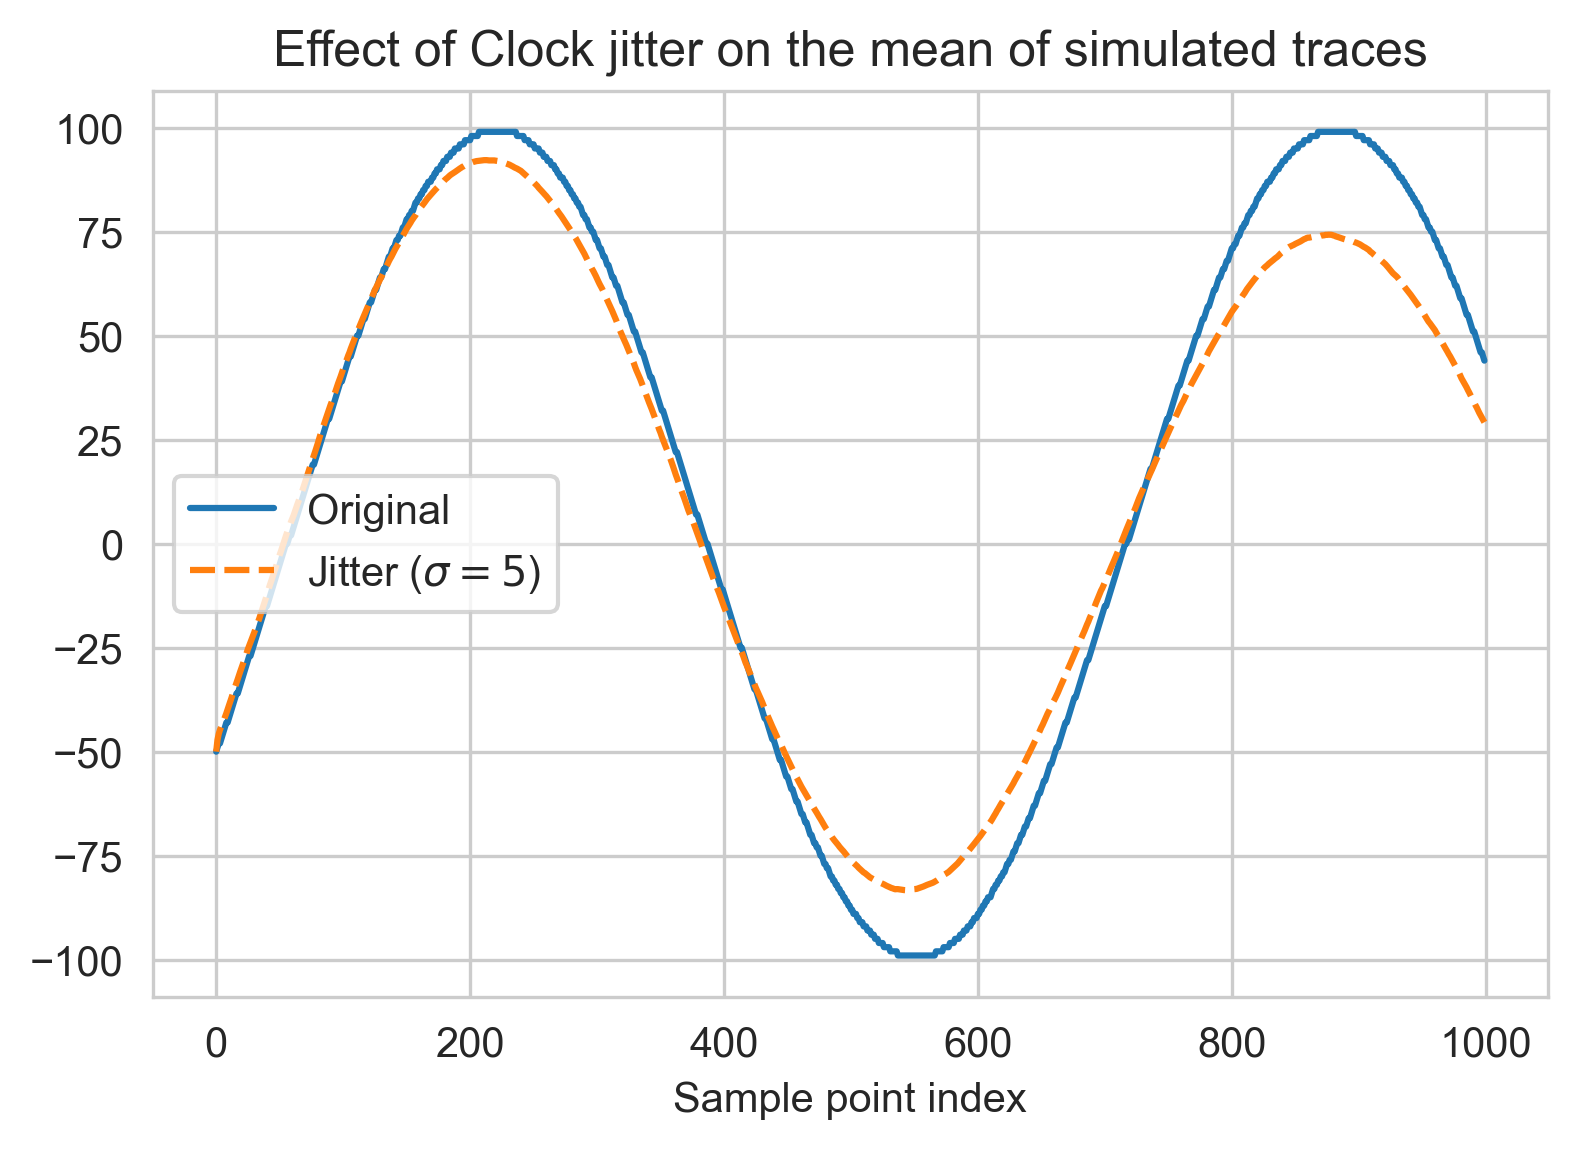

In [64]:
DEMO_CLOCK_VAR = 5
JITTER = clock_jitter(RAW_TRACES, WINDOW, DEMO_CLOCK_VAR)
G = sns.lineplot(data={"Original": TRACES[0], f"Jitter ($\sigma = {DEMO_CLOCK_VAR}$)": JITTER.mean(axis=0)})
G.set(**g_props("Clock jitter"))
plt.legend(loc='center left')

store_sns(G, "performance/pollution-jitter-mean")

### Random delay implementation

Differences in implementation from AISY lab:
- Sample point value capped at 127, which is the maximum value of `np.int8`. This prevents integer overflow issues after
applying the `delay_amplitude`.
- Variable delay probability.

Random delay (0.1): 100%|██████████| 1000/1000 [00:00<00:00, 1962.71it/s]


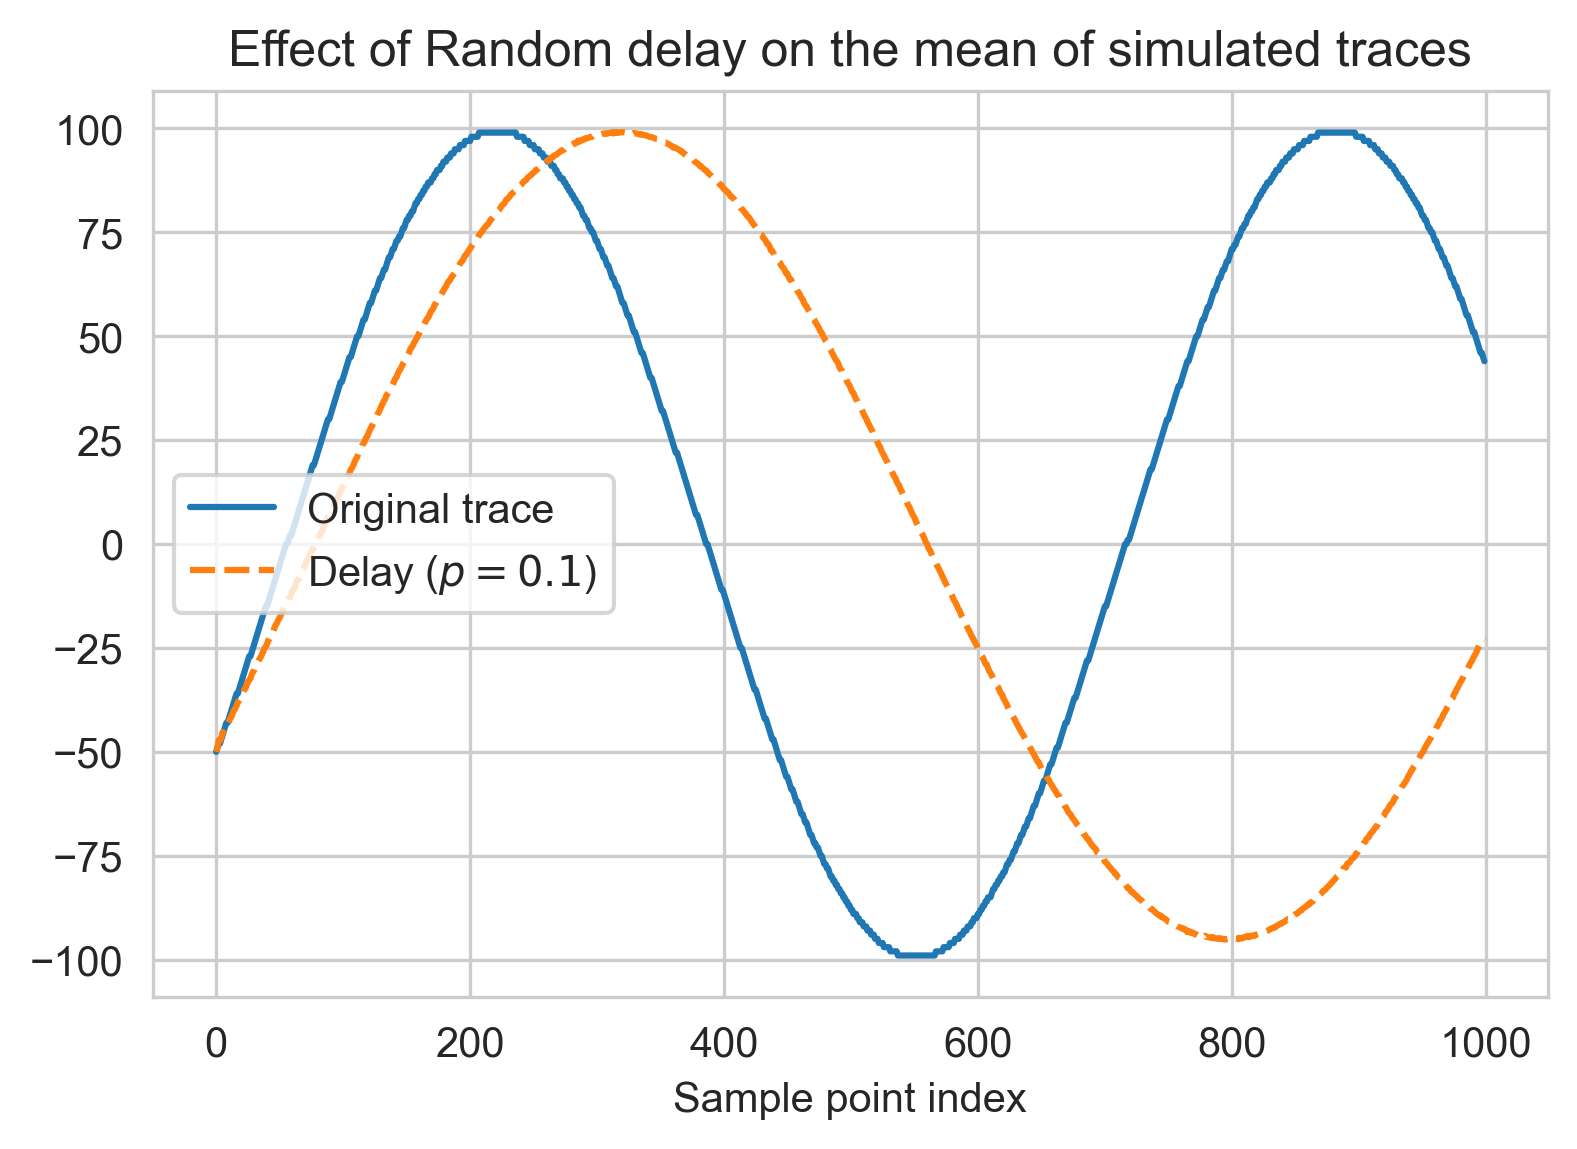

In [65]:
DELAY_PROB = .1
DELAY = random_delay(TRACES, A, B, DELAY_AMP, DELAY_PROB)
G = sns.lineplot(data={"Original trace": TRACES[0], f"Delay ($p ={DELAY_PROB}$)": DELAY.mean(axis=0)})
G.set(**g_props("Random delay"))
plt.legend(loc='center left')

store_sns(G, "performance/pollution-delay-mean")

In [66]:
np.iinfo(np.int8).max

127

### Gaussian noise implementation

No differences other than simplification.

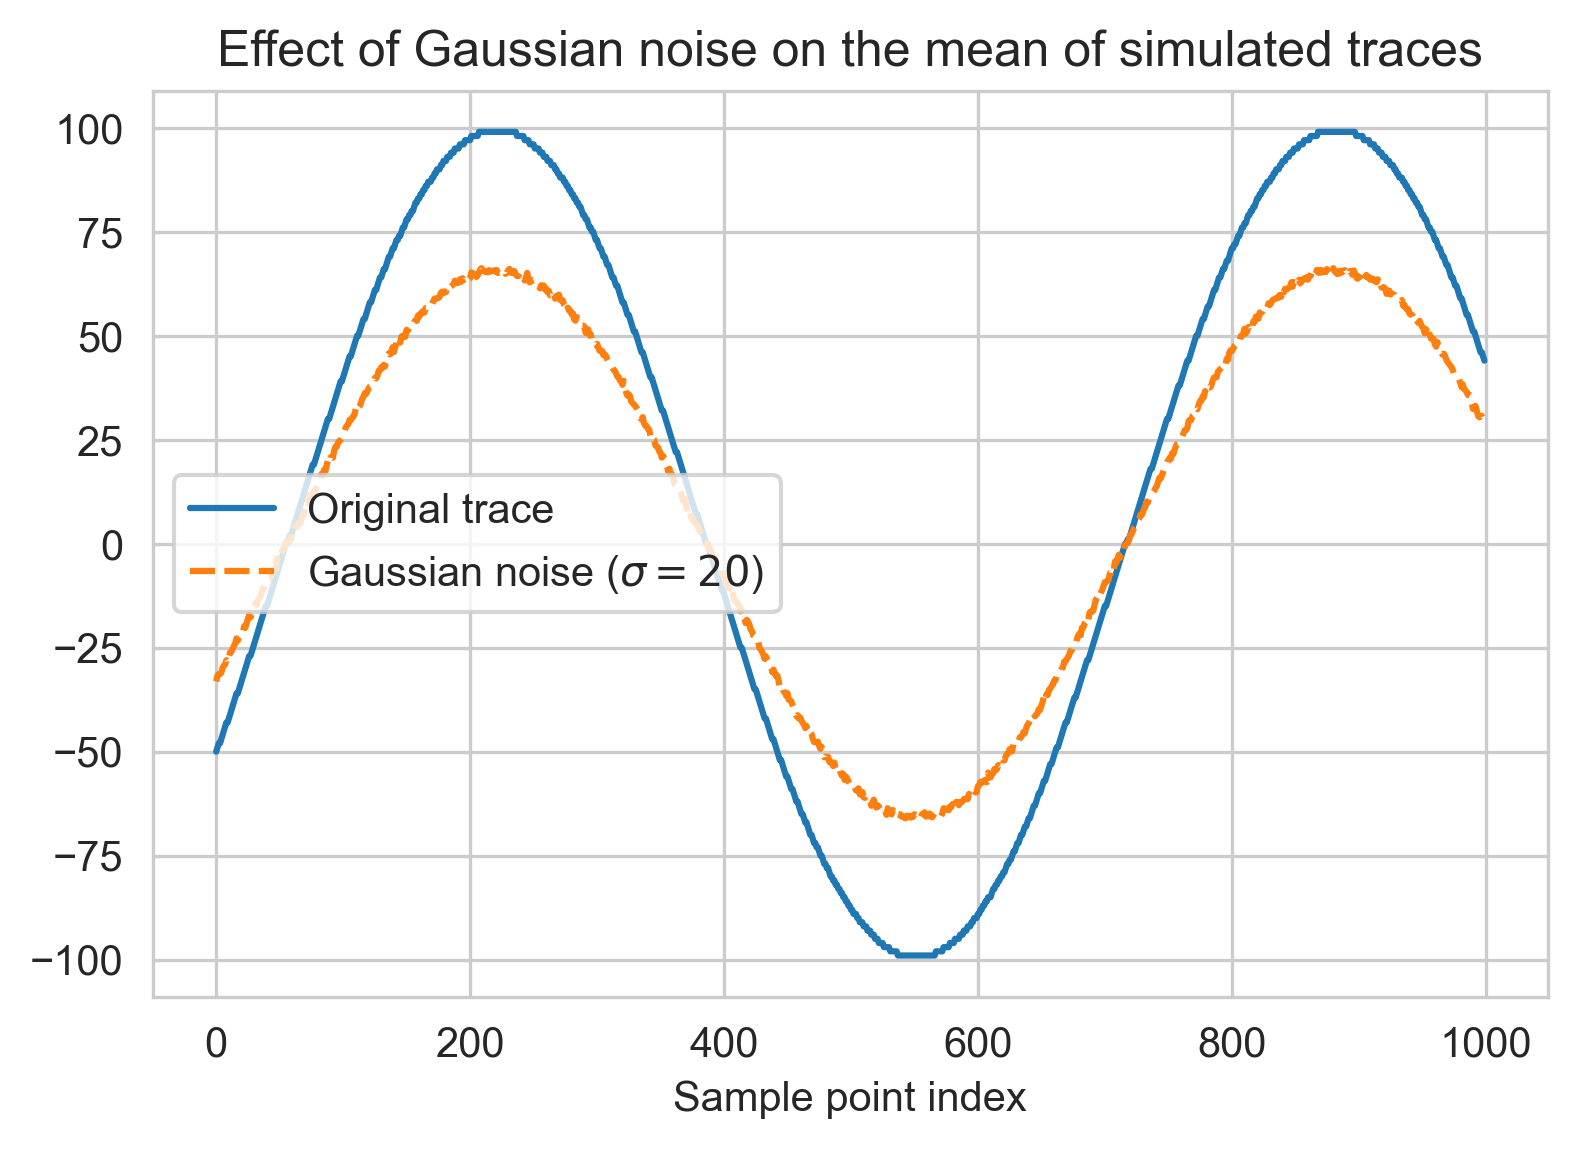

In [67]:
GAUSSIAN = gaussian_noise(TRACES, GAUSS_LEVEL)

G = sns.lineplot(data={"Original trace": TRACES[0], f"Gaussian noise ($\sigma = {GAUSS_LEVEL}$)": GAUSSIAN.mean(axis=0)})
G.set(**g_props("Gaussian noise"))
plt.legend(loc='center left')

store_sns(G, "performance/pollution-gauss-mean")
